<a href="https://colab.research.google.com/github/DiasMelissa/DiasMelissa/blob/main/Script15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**

In [2]:
from platform import python_version
print('Python Version', python_version())

Python Version 3.7.13


In [3]:
!pip install -q imdb-sqlite 

In [4]:
!pip install -q pycountry

     |████████████████████████████████| 10.1 MB 8.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [5]:
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')


In [6]:
%%time
!imdb-sqlite

2022-07-09 20:03:04,050 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads/name.basics.tsv.gz
2022-07-09 20:03:09,367 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads/title.basics.tsv.gz
2022-07-09 20:03:10,335 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads/title.akas.tsv.gz
2022-07-09 20:03:16,335 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads/title.principals.tsv.gz
2022-07-09 20:03:25,181 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads/title.episode.tsv.gz
2022-07-09 20:03:26,649 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads/title.ratings.tsv.gz
2022-07-09 20:03:26,775 Populating database: imdb.db
2022-07-09 20:03:26,776 Applying schema
2022-07-09 20:03:26,778 Importing file: downloads/name.basics.tsv.gz
2022-07-09 20:03:26,778 Reading number of rows ...
2022-07-09 20:03:33,036 Inserting rows into table: people
100% 11764878/11764878 [02:04<00:00, 94214.55 rows/s]
2022-07-09 20:0

In [7]:
conn = sqlite3.connect("imdb.db")

In [10]:
tables = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [11]:
type(tables)

pandas.core.frame.DataFrame

In [12]:
tables.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [13]:
tables = tables["Table_Name"].values.tolist()

In [14]:
for table in tables:
  query = 'PRAGMA TABLE_INFO({})'.format(table)
  result = pd.read_sql_query(query, conn)
  print("Table schema", table)
  display(result)
  print("-"*100)
  print("\n")

Table schema people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Table schema titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Table schema akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Table schema crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Table schema episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Table schema ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




In [15]:
firstQuery = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''

In [16]:
firstResult = pd.read_sql_query(firstQuery, conn)

In [17]:
display(firstResult)

,type,COUNT
0,movie,614813
1,short,878105
2,tvEpisode,6809035
3,tvMiniSeries,44173
4,tvMovie,136684
5,tvPilot,2
6,tvSeries,227742
7,tvShort,10603
8,tvSpecial,37558
9,video,262526


In [18]:
firstResult['percentual'] = (firstResult['COUNT'] / firstResult['COUNT'].sum()) * 100

In [19]:
display(firstResult)

,type,COUNT,percentual
0,movie,614813,6.791428
1,short,878105,9.699839
2,tvEpisode,6809035,75.214859
3,tvMiniSeries,44173,0.487950
4,tvMovie,136684,1.509857
5,tvPilot,2,0.000022
6,tvSeries,227742,2.515714
7,tvShort,10603,0.117124
8,tvSpecial,37558,0.414878
9,video,262526,2.899949


In [20]:
others = {}

others['COUNT'] = firstResult[firstResult['percentual'] < 5] ['COUNT'].sum()
others['percentual'] = firstResult[firstResult['percentual'] < 5]['percentual'].sum()
others['type'] = 'others'

In [21]:
others

{'COUNT': 750826, 'percentual': 8.293873074776265, 'type': 'others'}

In [22]:
firstResult = firstResult[firstResult['percentual'] > 5]

In [23]:
firstResult = firstResult.append(others, ignore_index = True)

In [24]:
firstResult = firstResult.sort_values(by = 'COUNT', ascending = False)

In [25]:
firstResult.head()

,type,COUNT,percentual
2,tvEpisode,6809035,75.214859
1,short,878105,9.699839
3,others,750826,8.293873
0,movie,614813,6.791428


In [26]:
from pandas._libs import index
labels = [str(firstResult['type'][i])+' '+'['+str(round(firstResult['percentual'][i],2)) +'%'+']' for i in firstResult.index]

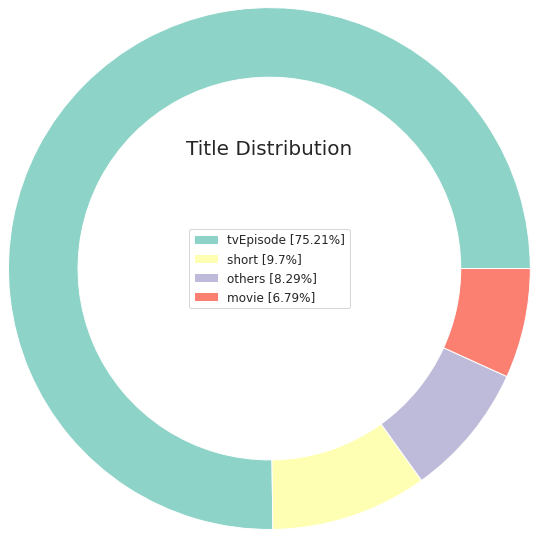

In [27]:
cs = cm.Set3(np.arange(100))
f = plt.figure()

plt.pie(firstResult['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Title Distribution", loc = 'Center', fontdict = {'fontsize':20, 'fontweight':20})
plt.show()

In [28]:
SecondQuery = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres'''

In [29]:
SecondQuery = pd.read_sql_query(SecondQuery, conn)

In [30]:
display(SecondQuery)

,genres,COUNT(*)
0,Action,14095
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1465,"Thriller,Western",43
1466,War,1300
1467,"War,Western",14
1468,Western,5108


In [31]:
SecondQuery['genres'] = SecondQuery['genres'].str.lower().values

In [32]:
temp = SecondQuery['genres'].dropna()

In [33]:
pattern = '(?u)\\b[\\w-]+\\b'
vector = CountVectorizer(token_pattern = pattern, analyzer = 'word').fit(temp)

In [34]:
type(vector)

sklearn.feature_extraction.text.CountVectorizer

In [35]:
bag_generos = vector.transform(temp)

In [36]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [37]:
generos_unicos = vector.get_feature_names()

In [38]:
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [39]:
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1470 non-null   int64
 1   adult        1470 non-null   int64
 2   adventure    1470 non-null   int64
 3   animation    1470 non-null   int64
 4   biography    1470 non-null   int64
 5   comedy       1470 non-null   int64
 6   crime        1470 non-null   int64
 7   documentary  1470 non-null   int64
 8   drama        1470 non-null   int64
 9   family       1470 non-null   int64
 10  fantasy      1470 non-null   int64
 11  film-noir    1470 non-null   int64
 12  game-show    1470 non-null   int64
 13  history      1470 non-null   int64
 14  horror       1470 non-null   int64
 15  music        1470 non-null   int64
 16  musical      1470 non-null   int64
 17  mystery      1470 non-null   int64
 18  n            1470 non-null   int64
 19  news         1470 non-null   int64
 20  reality-

In [40]:
generos = generos.drop(columns = 'n', axis = 0)

In [41]:
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [42]:
generos_percentual.head(10)

drama          17.891156
comedy         16.938776
documentary    15.782313
adventure      14.897959
action         14.557823
romance        13.265306
crime          12.993197
mystery        12.380952
thriller       12.312925
horror         12.176871
dtype: float64

Text(0.5, 1.0, '\n Number of Titles by Genres\n')

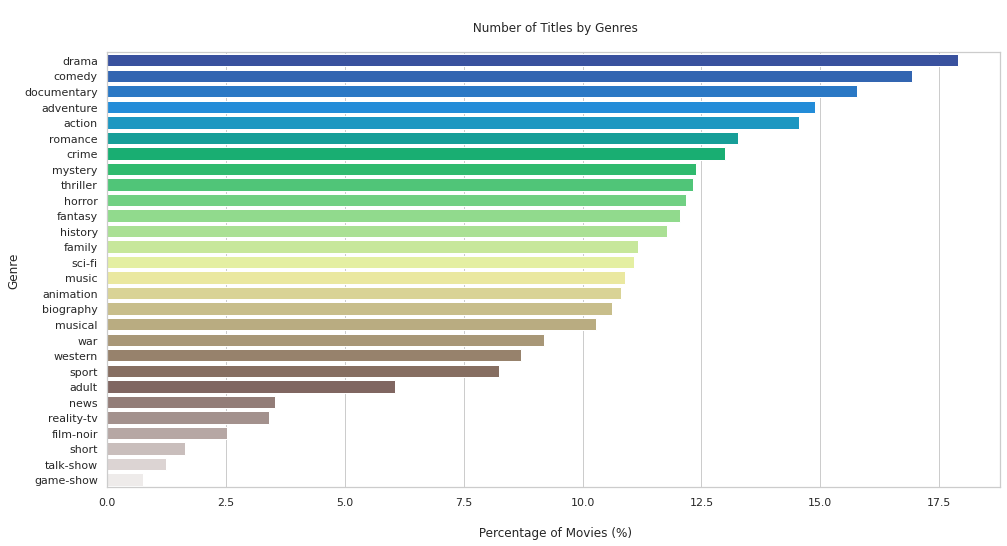

In [43]:
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = 'h', palette = 'terrain')
plt.ylabel('Genre')
plt.xlabel('\n Percentage of Movies (%)')
plt.title('\n Number of Titles by Genres\n')


In [62]:
ThirdQuery = '''SELECT rating, genres FROM
                ratings JOIN titles ON ratings.title_id = titles.title_id 
                WHERE premiered <= 2022 AND type ='movie'
                '''

In [63]:
ThirdQuery = pd.read_sql_query(ThirdQuery, conn)

In [64]:
display(ThirdQuery)

,rating,genres
0,4.5,\N
1,6.0,"Action,Adventure,Biography"
2,4.7,Drama
3,4.5,Drama
4,3.9,Drama
...,...,...
280472,5.8,Thriller
280473,6.4,"Drama,History"
280474,3.8,"Adventure,History,War"
280475,8.3,Drama


In [65]:
def return_genres(df):
  df['genres'] = df['genres'].str.lower().values
  temp = df['genres'].dropna()
  vector = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
  generos_unicos = vector.get_feature_names()
  generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
  return generos_unicos

In [66]:
generos_unicos = return_genres(ThirdQuery)

In [67]:
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [68]:
genero_counts = []
genero_ratings = []

In [70]:
for item in generos_unicos:
  consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres like'+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
  resultado = pd.read_sql_query(consulta, conn)
  genero_counts.append(resultado.values[0][0])

  consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres like'+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
  resultado = pd.read_sql_query(consulta, conn)
  genero_ratings.append(np.median(resultado['rating']))

In [75]:
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [76]:
df_genero_ratings.head(20)

,genres,count,rating
0,action,29093,5.80
1,adult,4393,5.80
2,adventure,17609,6.00
3,animation,4815,6.50
4,biography,8557,7.00
5,comedy,69284,6.00
6,crime,23982,6.10
7,documentary,42051,7.30
8,drama,124185,6.30
9,family,10826,6.30


In [77]:
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [78]:
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

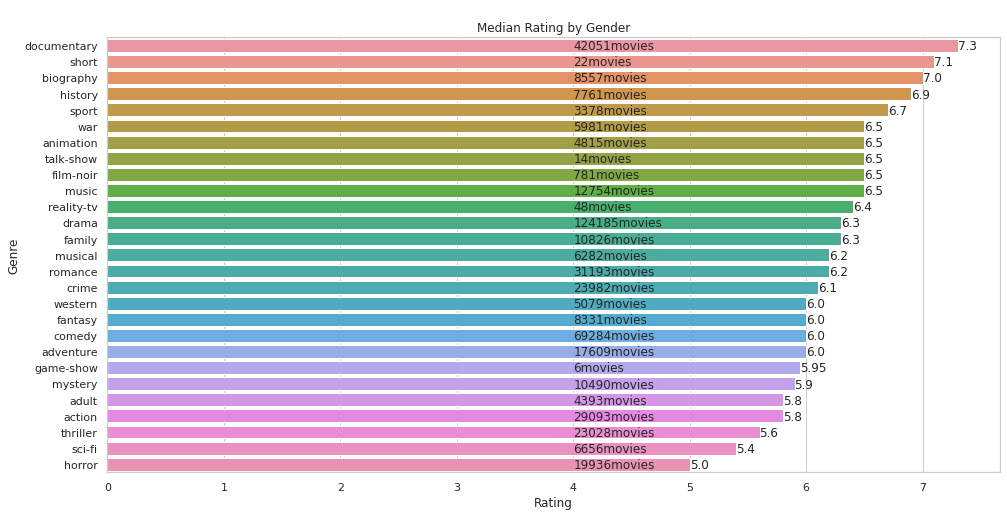

In [80]:
plt.figure(figsize = (16,8))

sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")


for i in range(len(df_genero_ratings.index)):

  plt.text(4.0, 
           i + 0.25,
           str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + "movies")
  plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
           i + 0.25,
           round(df_genero_ratings['rating'][df_genero_ratings.index[i]], 2))
  
plt.ylabel('Genre')
plt.xlabel('Rating')
plt.title('\nMedian Rating by Gender')
plt.show()
